#Drinking Water Potability Prediction using ML and H2O Auto ML

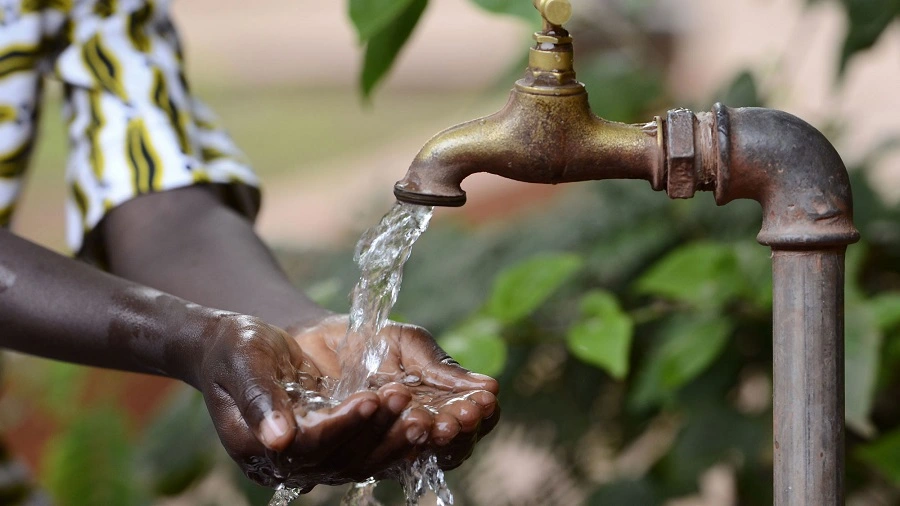


Access to clean water to drink is crucial for health, a fundamental human right, and a component of any health protection strategy. On a national, regional, and local level, this is significant as a health and development issue. Investments in water supply and sanitation have been shown to produce a net economic advantage in some areas because they reduce negative health effects and medical expenses more than they cost to implement.

**Dataset:** The drinkingwaterpotability.csv file contains water quality metrics for 3276 different water bodies.

**Project Steps:**

- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading & Checking the Dataset

In [ ]:
# load the dataset and assign it to variable "df"
df = pd.read_csv("drinking_water_potability.csv")

In [ ]:
# check the head of the data

df.head()

In [ ]:
# check the shape:  3276 rows and 10 columns
df.shape

In [ ]:
# check the key info: non-null count and data type
df.info()

In [ ]:
# check count of unique values within columns

df.nunique()

## Exploratory Data Analysis

In [ ]:
# check the descriptive statistics
# .style shows all the rows of DataFrame
df.describe().T.style 

In [ ]:
# visualise the count of potability.. ie "drinkable" and "not drinkable"
# the data is somewhat balanced so shouldn't be a problem
sns.countplot(data = df, x = df.Potability)
df.Potability.value_counts()

In [ ]:
# check for null-values 
df.isnull().sum()

In [ ]:
# create a dataframe with null values 
null_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0], columns=['Percentage of NaN values'])
null_columns['Total NaN Values'] = df[df.columns[df.isnull().any()]].isnull().sum()
null_columns

In [ ]:
# extract the null columns
null_cols = null_columns.index.tolist()
print(type(null_cols))

null_cols

In [ ]:
# visual representation of columns with missing values
import missingno as mno
mno.matrix(df[null_cols], figsize = (20, 6))
plt.show()

In [ ]:
# null-value distribution in same graph
for i in null_cols:
    sns.distplot(df[i])

### Handling Null Values

In [ ]:
# check the distribution of the ph column
sns.distplot(df.ph)

In [ ]:
# as the ph values exhibit a normal (gaussian) distribution,  we can safely replace the
# null-values with the mean of the ph feature
df["ph"] = df["ph"].replace(np.nan, df.ph.mean())

In [ ]:
# check distribution of Sulfate
sns.distplot(df.Sulfate)

In [ ]:
# as the Sulfate values exhibit a normal (gaussian) distribution,  we can safely replace the
# null-values with the mean of the Sulfate feature
df["Sulfate"] = df["Sulfate"].replace(np.nan,df.Sulfate.mean())

In [ ]:
sns.distplot(df.Trihalomethanes)

In [ ]:
# as the Trihalomethanes values exhibit a normal (gaussian) distribution,  we can safely replace the
# null-values with the mean of the Trihalomethanes feature
df["Trihalomethanes"] = df["Trihalomethanes"].replace(np.nan,df.Trihalomethanes.mean())

In [ ]:
# check if the null-replacement is a success
df.isnull().sum()

Pair plots are used to determine which attributes are most effective at illuminating a relationship between two variables or in forming the most distinct clusters. By making linear separations or simple lines in our data set, it also helps to create some basic categorization models.

In [ ]:
# lets check pairwise relationships in the dataset
sns.pairplot(data = df, hue="Potability")

In [ ]:
# create box charts to visualise any outliers etc.
# removing outliers can depend on domain knowledge
# ie. what does an outlier look like in your domain?  

for column in df.columns:
    plt.figure()
    df.boxplot([column])

In [ ]:
# check feature correlation
df.corr()

In [ ]:
# visualise correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## Feature Engineering

In [ ]:
# import Extra Trees Classifier and Random Forest Classifier
# splitting the data before feature engineering to avoid dataleaks. 
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop(["Potability"], axis=1)
y = df.Potability

In [ ]:
# invoke ExtraTreesClasifier 
ext = ExtraTreesClassifier()

# fit it to the X and y data. 
ext.fit(X, y)

In [ ]:
# check feature importance in numerical fashion
print(ext.feature_importances_)

In [ ]:
# plot feature importancee
feature = pd.Series(ext.feature_importances_,index=X.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind="barh")

## Split the Data for Model Development

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
# let's look at the shape of the different splits
print(X_train.shape)

print(X_test.shape)

## Standardising / Scaling Data

In [ ]:
df.head()

In [ ]:
# import the standard scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# invoke the StandardScaler
scale = MinMaxScaler()

In [ ]:
# fit & transform the data contained in X
# you don't have to scale the target feature as it's a binary value
scaled = scale.fit_transform(X_train)

In [ ]:
# create a datafram of the scaled data
scaled_df = pd.DataFrame(scaled, columns = X_train.columns)
scaled_df.head()

In [ ]:
# the next step will be transforming the TEST set using the same scaling
# however, it must not be "recalculated" using fit_transform as this will 
# cause data leakage,  instead we use transform. 

scaled_test = scale.transform(X_test)


scaled_df_test = pd.DataFrame(scaled_test, columns = X_test.columns)
scaled_df_test.head()

## Model Development

**We will use the following models:**

- **Logistic Regression** - *a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.*
- **Support Vector Machine** - *finds decision boundaries / hyperplanes in high dimension spaces (more here: https://www.youtube.com/watch?v=6DibfCCI6t0)*
- **Random Forest** - *an ensemble learning algorithm which combines single decision trees and uses a "bagging method" to determine prediction / classification*
- **XGBoost** - A grandient boosted tree which is extremely powerful

Other useful articles for accuracy metrics for classification problems: 

- [Understanding a Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
- [F1, Precision & Recall](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)
- [Roc Auc Score](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

In [ ]:
# import the machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

### Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_train_hat = xgb.predict(X_train)
y_test_hat = xgb.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

In [ ]:
# get Logistic Regression parameters
lr.get_params()

In [ ]:
# get SVC params
svm.get_params()

In [ ]:
# get Random Forest Params
rf.get_params()

In [ ]:
# get XGBoost params
xgb.get_params()

### Searching for best Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators':[100, 200, 300, 400, 500],
    'min_child_weight':[4, 5],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'gamma':[i/10.0 for i in range(3, 6)],  
    'subsample':[i/10.0 for i in range(6, 11)],
    'colsample_bytree':[i/10.0 for i in range(6, 11)], 
    'max_depth': [2, 3, 4, 6, 7, 8, 9, 10],
    'objective': ['binary:logistic'],
    'booster': ['gbtree', 'gblinear'],
}

hyper_model = XGBClassifier(random_state=42, verbosity=1, tree_method="gpu_hist", gpu_id=0)

random_search = RandomizedSearchCV(hyper_model, param_grid, n_iter=100, cv=5, random_state=42)

best_model = random_search.fit(X_train, y_train)
print('Optimum parameters', best_model.best_params_)

In [ ]:
# let's try the model with these new hyperparams
# we can directly unpack the best params instead of typing them out

new_hyper_model = XGBClassifier(**best_model.best_params_, random_state=42, verbosity=1, tree_method="gpu_hist", gpu_id=0)

new_hyper_model.fit(X_train, y_train)
y_train_hat = xgb.predict(X_train)
y_test_hat = xgb.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)


### Voting Classifer! 

We know the XGBoost and the Random Forest performed the best with our dataset.

A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. The aggregating criteria can be combined decision of voting for each estimator output. The voting criteria can be of two types:

* Hard Voting: Voting is calculated on the predicted output class.
* Soft Voting: Voting is calculated on the predicted probability of the output class. 

Documentation can be [found here.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 


In [ ]:
# building the voting classifier
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators=[
    ('rf', rf), 
    ('xgb', new_hyper_model)], 
    voting='hard')

In [ ]:
# fitting the voting classifier to our dataset#

VC.fit(X_train, y_train)

In [ ]:
# now let's measure the scores
y_train_hat = VC.predict(X_train)
y_test_hat = VC.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

## Using Auto ML

###H2O Auto ML

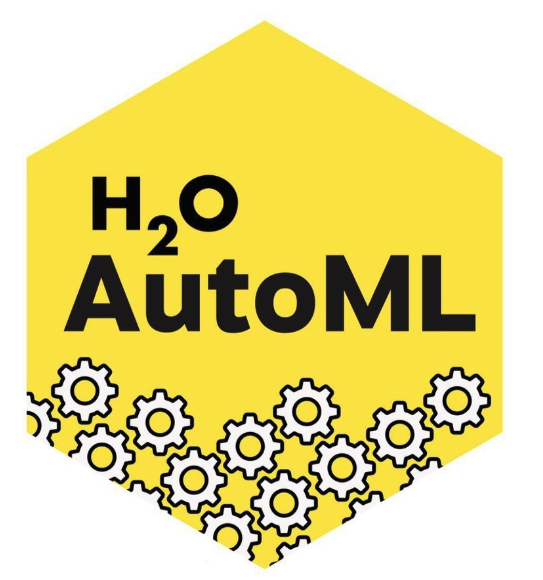

H2O is a distributed in-memory machine learning platform that is entirely open-source and has linear scalability. The most popular statistical & machine learning methods, such as deep learning, gradient boosted machines, and generalised linear models, are supported by H2O.

Useful articles:
- [H20 Documentation](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html)
- [Evaluation Metrics](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html)
- [Parameter Appendix](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/parameters.html)

### Installing H2O Auto ML

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

### Importing the h2o Python module and H2OAutoML class

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

### Loading data

In [ ]:
df = h2o.import_file("drinking_water_potability.csv")

In [ ]:
df.head()

In [ ]:
df.describe(chunk_summary=True)

### H2O AutoML Clean & Preprocess

In [ ]:
# AutoML can do all the data processing and cleaning 
df_train, df_test = df.split_frame(ratios=[.8])

### Defining the model

In [ ]:
# here we are assigning the automl instance to a variable, we are setting some
# parameters - max run time, 300s, max_models, seed (when seed is applied it will
# force the algorithm to act deterministically), verbosity prints the backend 
# system messages,  nfolds for cross validation. 
aml = H2OAutoML(max_runtime_secs=300, 
                max_models = 25,
                balance_classes=True,
		            seed = 1,
                verbosity = "info",
                nfolds = 5)

# changing the target variable to a categorical variable
df_train[y] = df_train[y].asfactor()
df_test[y] = df_test[y].asfactor()

In [ ]:
# defining the training
y = "Potability"
X = df.columns
X.remove(y)

### Fitting the model

In [ ]:
# fit the model to the data and begin training
aml.train(x = X, y = y, training_frame = df_train)

In [ ]:
# check the leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

In [ ]:
# let’s get the best performing model and examine its results.
best_model = aml.get_best_model()
print(best_model)

In [ ]:
# we can also evaluate the best model on a holdout test set using the same 
# evaluation metrics shown above.
best_model.model_performance(df_test)

In [ ]:
# now we can savce the top performing model to use later.

model_path = h2o.save_model(model=best_model,path="/content/", force=True)
print(model_path)

The saved binary model can be loaded in a different notebook and used make predictions on a test set. Note that the H2O version that was used to train the saved binary model must be the same as the one used in our inference environment.

In [ ]:
# we can then use this model in another notebook by using the below code: 
import h2o 
h2o.init()
loaded_model = h2o.load_model(path="/content/DRF_1_AutoML_2_20220907_102753")
loaded_model.predict(df_test)

H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

In [ ]:
# explain model
explain_model = aml.explain(frame = df_test, figsize = (8,6))

In addition, it also provides local explainability for individual records. We can input a H2OFrame into the frame argument and indicate which row we would like explained using the row_index argument. In this case we are explaining the results for row 15 of the test frame.

In [ ]:
aml.explain_row(frame = df_test, row_index = 15, figsize = (8,6))